In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# import EQ.csv
eq = pd.read_csv('EQ.csv', dtype='object')

In [3]:
# visulaise last 5 rows 
eq.tail(5)


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
8881,2023-12-19T02:43:10.876Z,-7.2425,119.1387,593.76,4.9,mb,95,26,2.074,0.75,...,2024-01-16T01:30:21.040Z,"142 km NNE of Bima, Indonesia",earthquake,3.86,6.268,0.054,107,reviewed,us,us
8882,2023-12-19T02:42:29.472Z,-22.785,172.3662,10,5.3,mww,64,74,4.546,0.74,...,2024-01-15T23:45:16.040Z,southeast of the Loyalty Islands,earthquake,10.15,1.808,0.075,17,reviewed,us,us
8883,2023-12-19T02:39:21.180Z,33.1113333,-115.6248333,9.51,1.34,ml,32,93,0.06641,0.19,...,2023-12-19T15:49:01.616Z,"8 km N of Westmorland, CA",earthquake,0.21,0.52,0.214,20,reviewed,ci,ci
8884,2023-12-19T02:35:17.230Z,38.8263321,-122.8048325,3.06,0.64,md,8,147,0.005036,0.01,...,2023-12-19T04:50:10.666Z,"7 km NW of The Geysers, CA",earthquake,1.08,1.47,0.12,7,automatic,nc,nc
8885,2023-12-19T02:34:46.768Z,57.8935,-153.7653,56.3,1.5,ml,NaN,NaN,NaN,0.32,...,2024-01-05T18:45:34.407Z,"41 km NNE of Larsen Bay, Alaska",earthquake,NaN,0.5,NaN,NaN,reviewed,ak,ak


In [4]:
# information about dataset
eq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8886 entries, 0 to 8885
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   time             8886 non-null   object
 1   latitude         8886 non-null   object
 2   longitude        8886 non-null   object
 3   depth            8886 non-null   object
 4   mag              8886 non-null   object
 5   magType          8886 non-null   object
 6   nst              7092 non-null   object
 7   gap              7092 non-null   object
 8   dmin             5965 non-null   object
 9   rms              8886 non-null   object
 10  net              8886 non-null   object
 11  id               8886 non-null   object
 12  updated          8886 non-null   object
 13  place            8886 non-null   object
 14  type             8886 non-null   object
 15  horizontalError  6349 non-null   object
 16  depthError       8886 non-null   object
 17  magError         7076 non-null   

In [5]:
# missing valiues in dataset

eq.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1794
gap                1794
dmin               2921
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2537
depthError            0
magError           1810
magNst             1796
status                0
locationSource        0
magSource             0
dtype: int64

In [6]:
# assign columns to replace with np.nan
columns_to_replace = ['gap', 'dmin', 'horizontalError', 'magError', 'magNst', 'nst']

# Replace empty values ('') with np.nan in specified columns
eq[columns_to_replace] = eq[columns_to_replace].replace('', np.nan)

In [7]:

# Replace missing values with median in specified columns
for column in columns_to_replace:
    median_value = eq[column].median()
    eq[column] = eq[column].fillna(median_value)

In [8]:
# check missing values have been replaced
eq.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

In [9]:
# display last 5 rows
eq.tail(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
8881,2023-12-19T02:43:10.876Z,-7.2425,119.1387,593.76,4.9,mb,95,26,2.074,0.75,...,2024-01-16T01:30:21.040Z,"142 km NNE of Bima, Indonesia",earthquake,3.86,6.268,0.054,107,reviewed,us,us
8882,2023-12-19T02:42:29.472Z,-22.785,172.3662,10,5.3,mww,64,74,4.546,0.74,...,2024-01-15T23:45:16.040Z,southeast of the Loyalty Islands,earthquake,10.15,1.808,0.075,17,reviewed,us,us
8883,2023-12-19T02:39:21.180Z,33.1113333,-115.6248333,9.51,1.34,ml,32,93,0.06641,0.19,...,2023-12-19T15:49:01.616Z,"8 km N of Westmorland, CA",earthquake,0.21,0.52,0.214,20,reviewed,ci,ci
8884,2023-12-19T02:35:17.230Z,38.8263321,-122.8048325,3.06,0.64,md,8,147,0.005036,0.01,...,2023-12-19T04:50:10.666Z,"7 km NW of The Geysers, CA",earthquake,1.08,1.47,0.12,7,automatic,nc,nc
8885,2023-12-19T02:34:46.768Z,57.8935,-153.7653,56.3,1.5,ml,18.0,91.0,0.05383,0.32,...,2024-01-05T18:45:34.407Z,"41 km NNE of Larsen Bay, Alaska",earthquake,0.45,0.5,0.173,11.0,reviewed,ak,ak


In [10]:
# check count of each type
eq["type"].value_counts()

type
earthquake      8746
quarry blast      82
explosion         39
ice quake         19
Name: count, dtype: int64

In [11]:
# data to be used just for earthquakes, remove quarry blast, explosion, ice quakes

# Filter the data to include only earthquakes
eq = eq[eq["type"] == "earthquake"]

# Remove quarry blast, explosion, and ice quakes
eq = eq[~eq["type"].isin(["quarry blast", "explosion", "ice quake"])]

In [12]:
# check count of each type again to confirm only earthquakes
eq["type"].value_counts()

type
earthquake    8746
Name: count, dtype: int64

In [13]:
# not all columns are suitable for statistical description, check dtypes for which are numeric and which are not
print(eq.dtypes)

time               object
latitude           object
longitude          object
depth              object
mag                object
magType            object
nst                object
gap                object
dmin               object
rms                object
net                object
id                 object
updated            object
place              object
type               object
horizontalError    object
depthError         object
magError           object
magNst             object
status             object
locationSource     object
magSource          object
dtype: object


In [14]:
# convert all numerical columns showing as object to numeric

columns_to_convert = ['latitude', 'longitude', 'depth', 'mag', 'rms', 'depth', 'depthError', 'nst', 'gap', 'dmin', 'magError', 'magNst', 'horizontalError']
  

# Convert specified columns to numeric
for column in columns_to_convert:
    eq[column] = pd.to_numeric(eq[column], errors='coerce')

# Get summary statistics for all numeric columns
eq.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000
mean,39.217329,-111.045173,23.151507,1.639766,23.214612,105.764124,0.393068,0.276845,1.309471,1.766684,0.233277,15.839812
std,18.358115,69.348105,51.953792,1.232243,21.190643,57.383621,1.829197,0.274666,2.537884,5.884167,0.352568,26.289658
min,-65.494800,-179.957700,-3.160000,-1.270000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.332208,-150.640100,3.210000,0.830000,12.000000,70.000000,0.026615,0.090000,0.310000,0.440000,0.128000,7.000000
50%,38.815416,-122.437083,7.890000,1.420000,18.000000,91.000000,0.053830,0.170000,0.450000,0.750000,0.173000,11.000000
75%,53.357375,-114.359125,16.895000,2.070000,27.000000,124.000000,0.085218,0.430000,0.681409,1.490000,0.219000,16.000000
max,80.512900,179.884600,660.826000,7.500000,598.000000,344.000000,43.556000,3.250000,17.780000,449.100000,5.180000,722.000000


In [15]:
# shows the number of occurences for each place
eq["place"].value_counts()


place
8 km NW of The Geysers, CA                   122
7 km NW of The Geysers, CA                   119
6 km NW of The Geysers, CA                    92
3 km NNE of Reno, Nevada                      67
2 km NNE of Reno, Nevada                      62
                                            ... 
66 km W of Ollagüe, Chile                      1
14 km WNW of Calistoga, CA                     1
3 km S of San Bernardino, CA                   1
74 km NE of Cruz Bay, U.S. Virgin Islands      1
41 km NNE of Larsen Bay, Alaska                1
Name: count, Length: 4895, dtype: int64

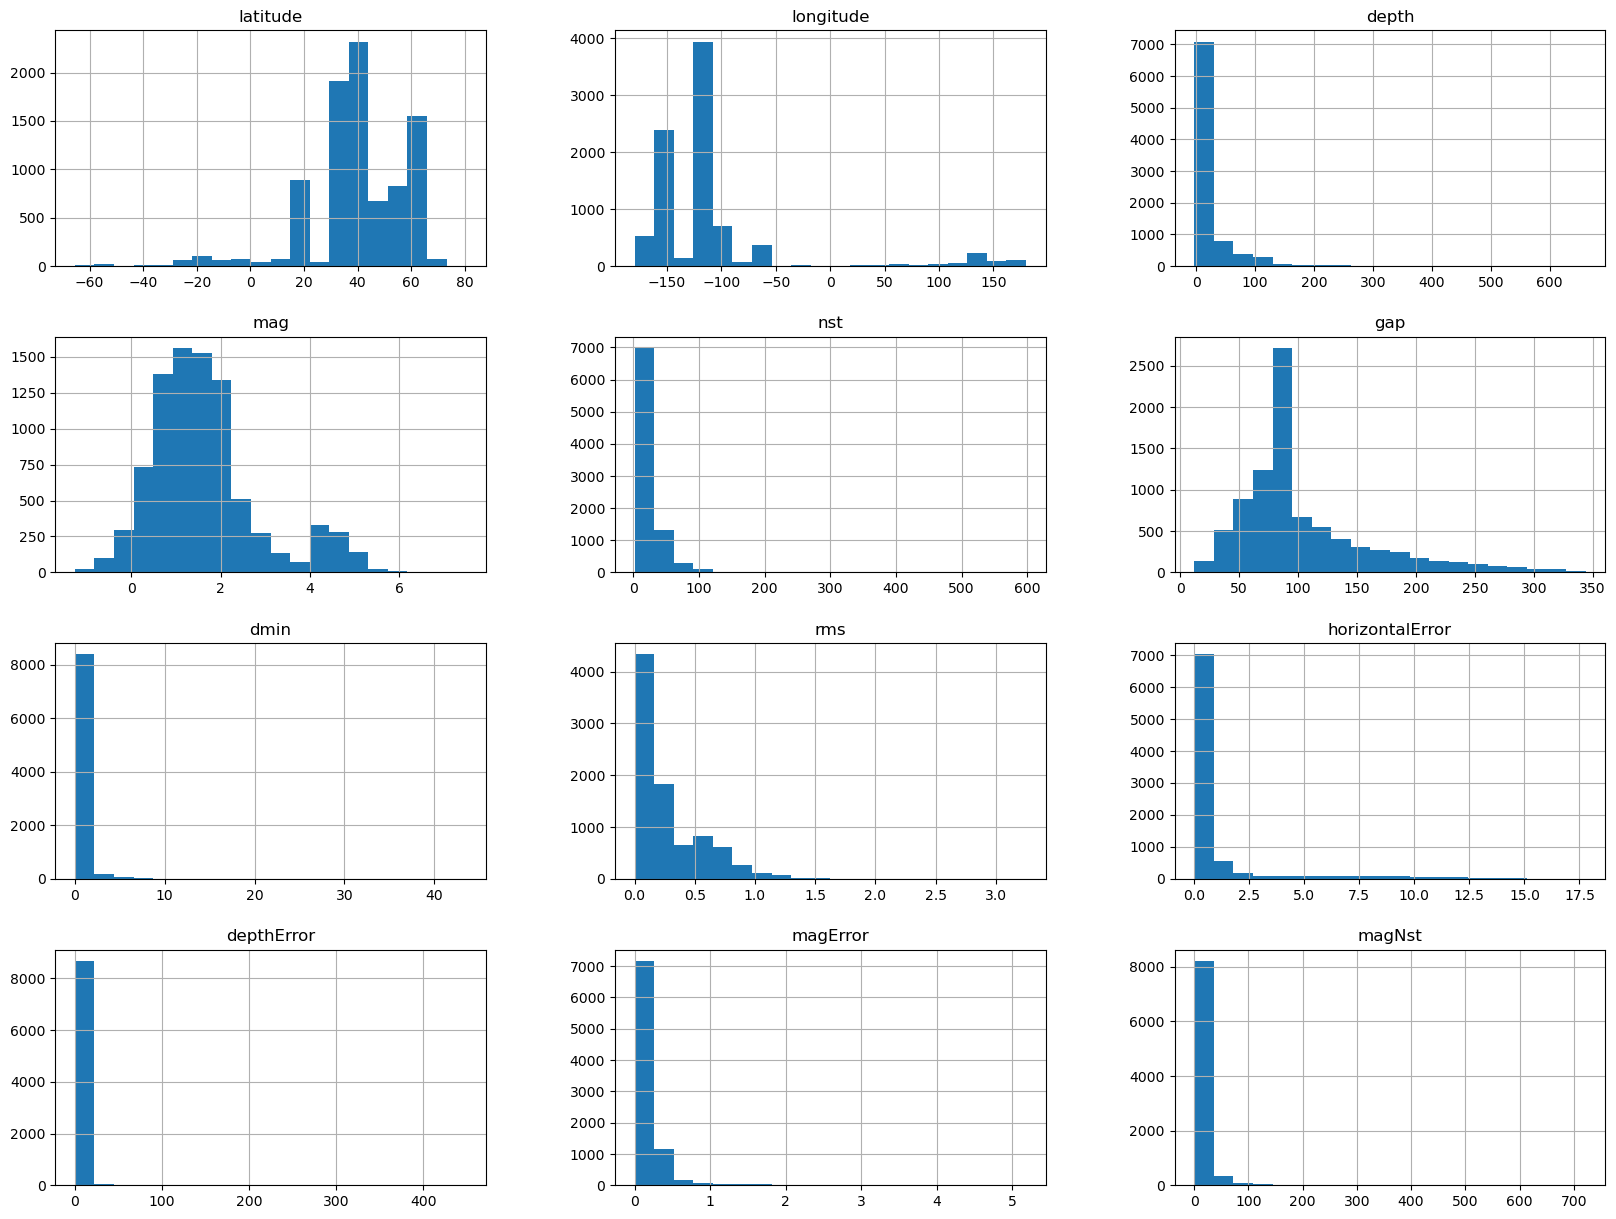

In [16]:
eq.hist (bins=20, figsize=(20,15))
plt.show()

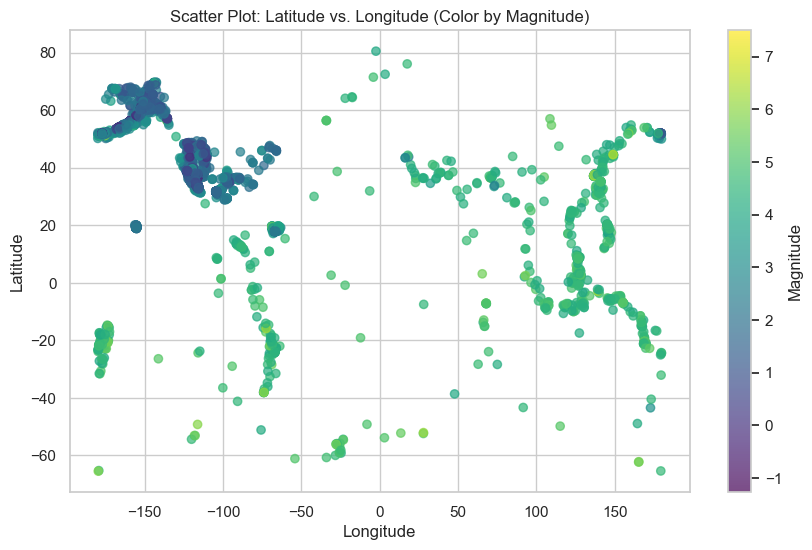

In [66]:
# Scatter plot for latitude vs. longitude

plt.figure(figsize=(10, 6))
plt.scatter(eq['longitude'], eq['latitude'], c=eq['mag'], cmap='viridis', alpha=0.7) # cmap(colour map) viridis colour map is used. ## alpha=0.7 means that each point in the scatter plot will be 70% opaque, allowing some transparency. 
plt.title('Scatter Plot: Latitude vs. Longitude (Color by Magnitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Magnitude')
plt.show()

In [ ]:
# Ggeographical plot using 'latitude' and 'longitude' to visualize earthquake locations on a map

import folium
from folium.plugins import MarkerCluster

# Create a map centered at the mean latitude and mean longitude
map_center = [eq['latitude'].mean(), eq['longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=3)

# Create a MarkerCluster to add markers for each earthquake
marker_cluster = MarkerCluster().add_to(my_map)

# Add markers for each earthquake
for index, row in eq.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Magnitude: {row['mag']}, Depth: {row['depth']}",
        icon=None,
    ).add_to(marker_cluster)

# Save the map to an HTML file
my_map.save("earthquake_map.html")

# Open the saved HTML file in a web browser to view the map
from folium.plugins import MarkerCluster


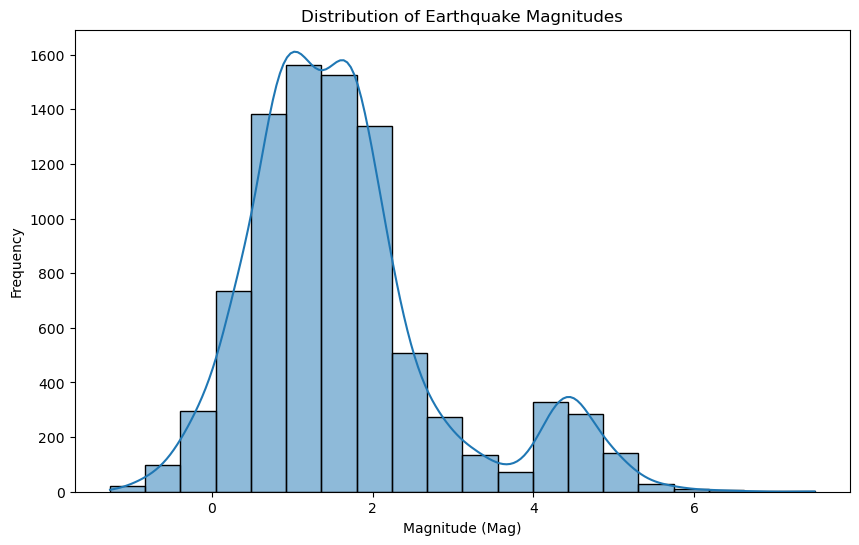

/Users/douglasburns/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


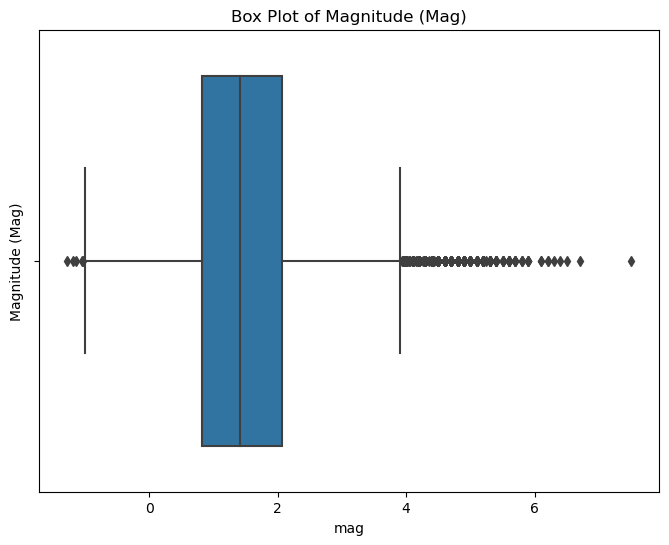

/var/folders/p9/4364mm650pq491d0qjwx8rzm0000gn/T/ipykernel_25710/13517273.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mag_data, shade=True)


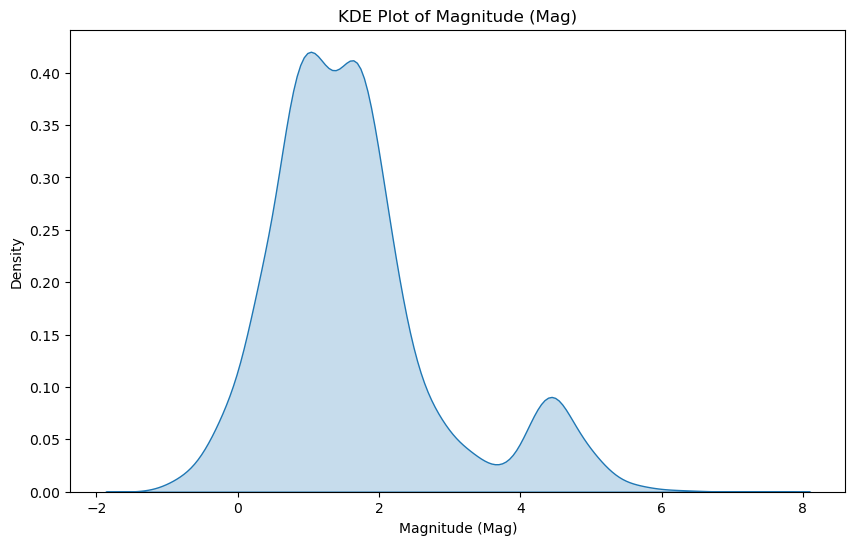

Summary Statistics for Magnitude (Mag):
 count    8746.000000
mean        1.639766
std         1.232243
min        -1.270000
25%         0.830000
50%         1.420000
75%         2.070000
max         7.500000
Name: mag, dtype: float64


In [17]:
# Do a univariate analysis for mag
mag_data = eq['mag']

# Summary statistics
summary_stats = mag_data.describe()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(mag_data, bins=20, kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude (Mag)')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=mag_data, orient='vertical')
plt.title('Box Plot of Magnitude (Mag)')
plt.ylabel('Magnitude (Mag)')
plt.show()

# KDE (Kernel Density Estimate) plot
plt.figure(figsize=(10, 6))
sns.kdeplot(mag_data, shade=True)
plt.title('KDE Plot of Magnitude (Mag)')
plt.xlabel('Magnitude (Mag)')
plt.ylabel('Density')
plt.show()

# Summary statistics
print("Summary Statistics for Magnitude (Mag):\n", summary_stats)


/var/folders/p9/4364mm650pq491d0qjwx8rzm0000gn/T/ipykernel_1155/3149814854.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(eq_uni_data[variable], ax=axes[i, 2], shade=True, color='salmon')
/var/folders/p9/4364mm650pq491d0qjwx8rzm0000gn/T/ipykernel_1155/3149814854.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(eq_uni_data[variable], ax=axes[i, 2], shade=True, color='salmon')
/var/folders/p9/4364mm650pq491d0qjwx8rzm0000gn/T/ipykernel_1155/3149814854.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(eq_uni_data[variable], ax=axes[i, 2], shade=True, color='salmon')
/var/folders/p9/4364mm650pq491d0qjwx8rzm0000gn

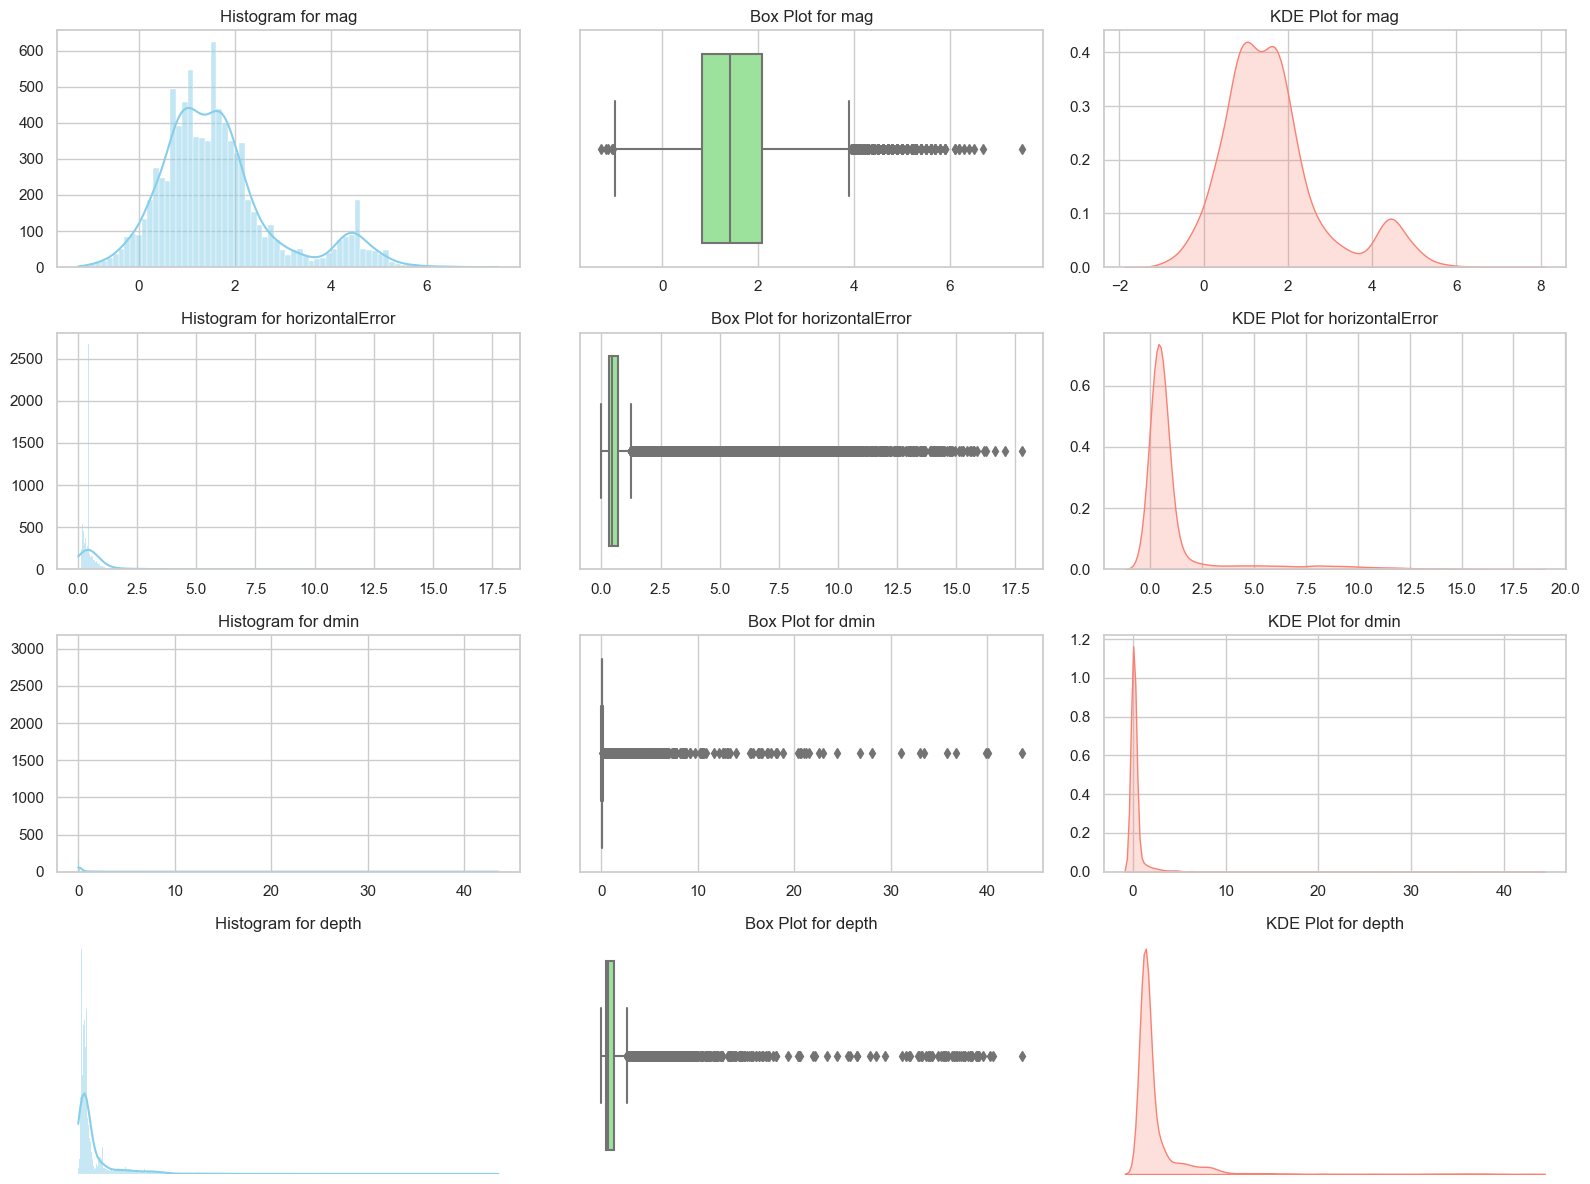

Summary Statistics for mag, horizontalError, dmin, depth:
                mag  horizontalError         dmin        depth
count  8746.000000      8746.000000  8746.000000  8746.000000
mean      1.639766         1.309471     0.393068    23.151507
std       1.232243         2.537884     1.829197    51.953792
min      -1.270000         0.000000     0.000000    -3.160000
25%       0.830000         0.310000     0.026615     3.210000
50%       1.420000         0.450000     0.053830     7.890000
75%       2.070000         0.681409     0.085218    16.895000
max       7.500000        17.780000    43.556000   660.826000


In [70]:
# Do a univariate analysis for each variable mag, horizontalError, dmin, depth.

eq_uni_data = eq[['mag', 'horizontalError', 'dmin', 'depth']]  # Use double square brackets

# Summary statistics
summary_stats = eq_uni_data.describe()

# Define the variables for univariate analysis
variables = ['mag', 'horizontalError', 'dmin', 'depth']

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(16, 12))

# Loop through rows and columns to create subplots for each variable
for i, variable in enumerate(variables):
    # Histogram plot
    sns.histplot(eq_uni_data[variable], ax=axes[i, 0], kde=True, color='skyblue')
    axes[i, 0].set_title(f'Histogram for {variable}')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('')
    
    # Box plot
    sns.boxplot(x=eq_uni_data[variable], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Box Plot for {variable}')
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')
    
    # KDE plot
    sns.kdeplot(eq_uni_data[variable], ax=axes[i, 2], shade=True, color='salmon')
    axes[i, 2].set_title(f'KDE Plot for {variable}')
    axes[i, 2].set_xlabel('')
    axes[i, 2].set_ylabel('')

# Hide the empty subplots in the last row
for j in range(3):
    axes[3, j].axis('off')

# Adjust subplot layout and spacing
plt.tight_layout()

# Show the figure
plt.show()

print("Summary Statistics for mag, horizontalError, dmin, depth:\n", summary_stats)


Following the results from the heatmap, do a more targeted bivariate analysis for mag and horizontalError, mag and rms, horizontalError and dmin, horizontalError and depth. 

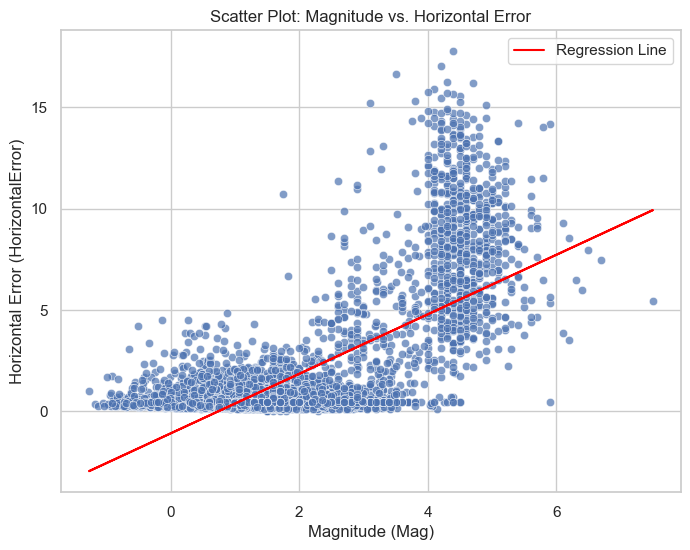

Correlation Coefficient: 0.71


In [156]:

from scipy.stats import linregress

# Assuming 'eq' is your earthquake dataset with 'Mag' and 'HorizontalError' columns

# Extract 'Mag' and 'HorizontalError' columns
mag = eq['mag']
horizontal_error = eq['horizontalError']

# 1. Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=mag, y=horizontal_error, alpha=0.7, edgecolor='w', linewidth=0.5)
plt.xlabel('Magnitude (Mag)')
plt.ylabel('Horizontal Error (HorizontalError)')
plt.title('Scatter Plot: Magnitude vs. Horizontal Error')
plt.grid(True)

# 2. Regression Analysis
slope, intercept, r_value, p_value, std_err = linregress(mag, horizontal_error)
line = slope * mag + intercept
plt.plot(mag, line, color='red', label='Regression Line')

# 3. Correlation Coefficient
correlation_coefficient = r_value

# Show the legend
plt.legend()

# Show the plot
plt.show()

# Display the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')


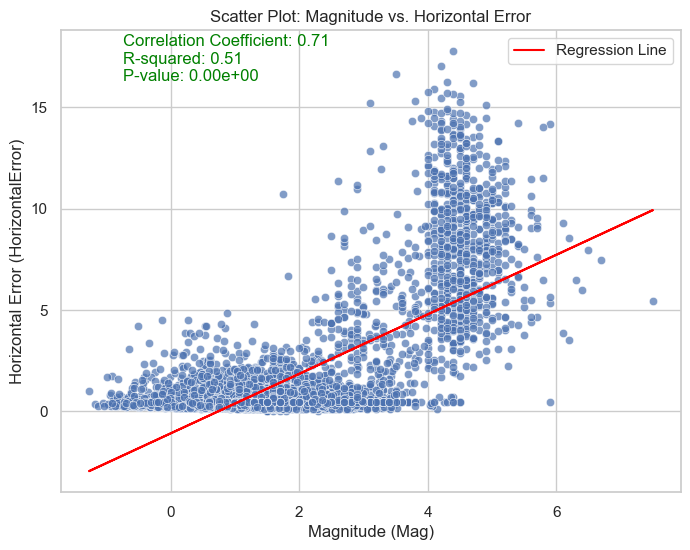

In [159]:


# Extract 'Mag' and 'HorizontalError' columns
mag = eq['mag']
horizontal_error = eq['horizontalError']

# 1. Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=mag, y=horizontal_error, alpha=0.7, edgecolor='w', linewidth=0.5)
plt.xlabel('Magnitude (Mag)')
plt.ylabel('Horizontal Error (HorizontalError)')
plt.title('Scatter Plot: Magnitude vs. Horizontal Error')
plt.grid(True)

# 2. Regression Analysis
slope, intercept, r_value, p_value, std_err = linregress(mag, horizontal_error)
line = slope * mag + intercept
plt.plot(mag, line, color='red', label='Regression Line')

# 3. Correlation Coefficient
correlation_coefficient = r_value

# Display the correlation coefficient, R-squared, and p-value
text = f'Correlation Coefficient: {correlation_coefficient:.2f}\nR-squared: {r_value ** 2:.2f}\nP-value: {p_value:.2e}'
plt.annotate(text, xy=(0.1, 0.89), xycoords='axes fraction', color='green', fontsize=12)
plt.legend()

# Show the plot
plt.show()


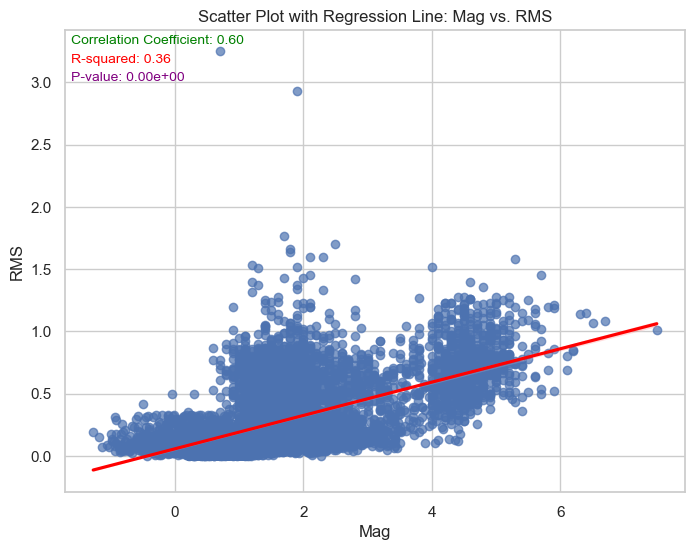

In [152]:
# Bivariate analysis for mag and rms

# Extract the variables of interest
mag = eq['mag']
rms = eq['rms']

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(mag, rms)[0, 1]

# Calculate the linear regression statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(mag, rms)

# Calculate the R-squared value
r_squared = r_value ** 2

# Create a scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=mag, y=rms, scatter_kws={'alpha':0.7},  line_kws={'color': 'red'})
plt.title('Scatter Plot with Regression Line: Mag vs. RMS')
plt.xlabel('Mag')
plt.ylabel('RMS')
plt.grid(True)

# Annotate the correlation coefficient, R-squared, and p-value on the graph
correlation_text = f'Correlation Coefficient: {correlation_coefficient:.2f}'
r_squared_text = f'R-squared: {r_squared:.2f}'
p_value_text = f'P-value: {p_value:.2e}'

plt.annotate(correlation_text, xy=(0.01, 0.97), xycoords='axes fraction', color='green', fontsize=10)
plt.annotate(r_squared_text, xy=(0.01, 0.93), xycoords='axes fraction', color='red', fontsize=10)
plt.annotate(p_value_text, xy=(0.01, 0.89), xycoords='axes fraction', color='purple', fontsize=10)

# Show the plot
plt.show()


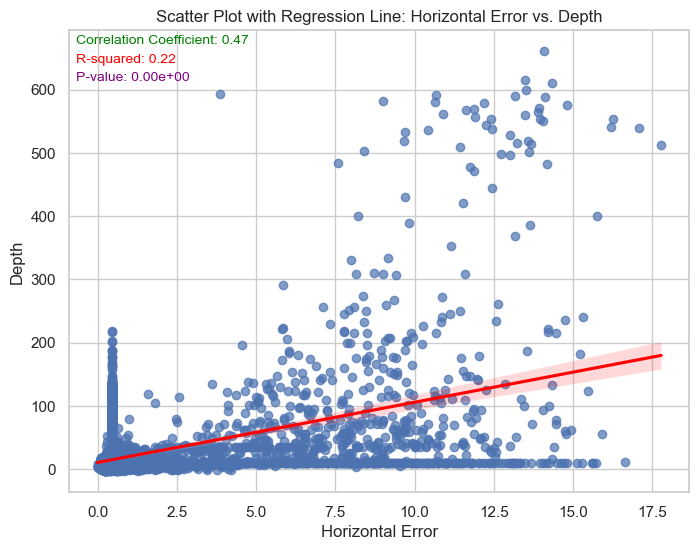

In [149]:
# Bivariate analysis for horizontalError and depth

# Extract the variables of interest
horizontal_error = eq['horizontalError']
depth = eq['depth']

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(horizontal_error, depth)[0, 1]

# Calculate the linear regression statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(horizontal_error, depth)

# Calculate the R-squared value
r_squared = r_value ** 2

# Create a scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=horizontal_error, y=depth, scatter_kws={'alpha':0.7},  line_kws={'color': 'red'})
plt.title('Scatter Plot with Regression Line: Horizontal Error vs. Depth')
plt.xlabel('Horizontal Error')
plt.ylabel('Depth')
plt.grid(True)

# Annotate the correlation coefficient, R-squared, and p-value on the graph
correlation_text = f'Correlation Coefficient: {correlation_coefficient:.2f}'
r_squared_text = f'R-squared: {r_squared:.2f}'
p_value_text = f'P-value: {p_value:.2e}'

plt.annotate(correlation_text, xy=(0.01, 0.97), xycoords='axes fraction', color='green', fontsize=10)
plt.annotate(r_squared_text, xy=(0.01, 0.93), xycoords='axes fraction', color='red', fontsize=10)
plt.annotate(p_value_text, xy=(0.01, 0.89), xycoords='axes fraction', color='purple', fontsize=10)

# Show the plot
plt.show()


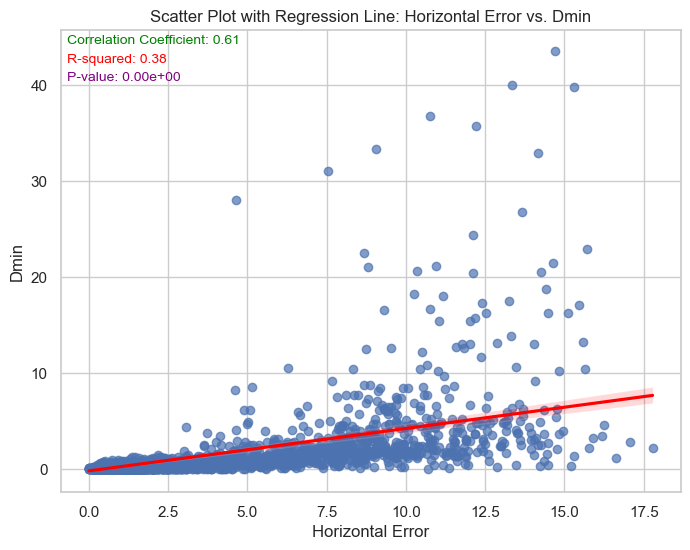

In [150]:
# Bivariate analysis for horizontalError and dmin

# Extract the variables of interest
horizontal_error = eq['horizontalError']
dmin = eq['dmin']

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(horizontal_error, dmin)[0, 1]

# Calculate the linear regression statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(horizontal_error, dmin)

# Calculate the R-squared value
r_squared = r_value ** 2

# Create a scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=horizontal_error, y=dmin, scatter_kws={'alpha':0.7},  line_kws={'color': 'red'})
plt.title('Scatter Plot with Regression Line: Horizontal Error vs. Dmin')
plt.xlabel('Horizontal Error')
plt.ylabel('Dmin')
plt.grid(True)

# Annotate the correlation coefficient, R-squared, and p-value on the graph
correlation_text = f'Correlation Coefficient: {correlation_coefficient:.2f}'
r_squared_text = f'R-squared: {r_squared:.2f}'
p_value_text = f'P-value: {p_value:.2e}'

plt.annotate(correlation_text, xy=(0.01, 0.97), xycoords='axes fraction', color='green', fontsize=10)
plt.annotate(r_squared_text, xy=(0.01, 0.93), xycoords='axes fraction', color='red', fontsize=10)
plt.annotate(p_value_text, xy=(0.01, 0.89), xycoords='axes fraction', color='purple', fontsize=10)

# Show the plot
plt.show()


In [76]:
# Define the dependent variable and independent variables
y = eq['mag']
X = eq[['depth', 'horizontalError']]

# Add a constant (intercept) term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mag   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     4597.
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:31:22   Log-Likelihood:                -11094.
No. Observations:                8746   AIC:                         2.219e+04
Df Residuals:                    8743   BIC:                         2.221e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.1700      0.011    1

In [77]:
from mpl_toolkits.mplot3d import Axes3D

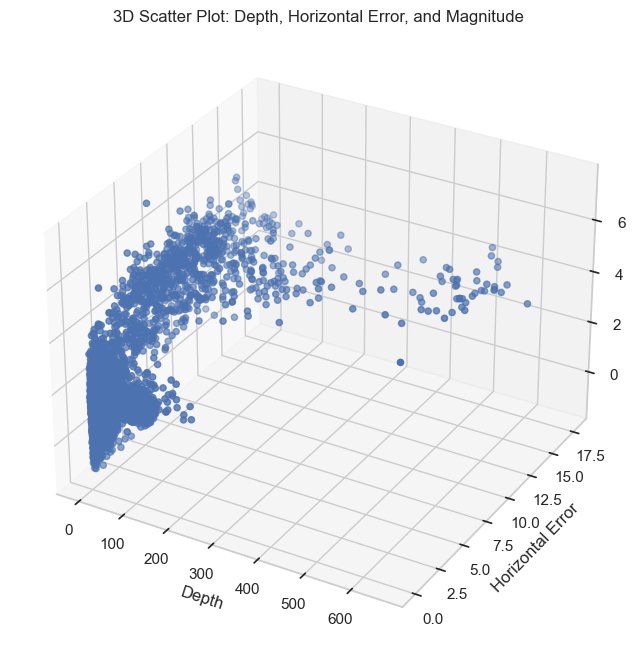

<Figure size 640x480 with 0 Axes>

In [89]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the dependent variable and independent variables
y = eq['mag']
x1 = eq['depth']
x2 = eq['horizontalError']

# Scatter plot points
ax.scatter(x1, x2, y, c='b', marker='o')

# Add labels and title
ax.set_xlabel('Depth')
ax.set_ylabel('Horizontal Error')
ax.set_zlabel('Magnitude (Mag)')
plt.title('3D Scatter Plot: Depth, Horizontal Error, and Magnitude')

# Show the plot
plt.show()

plt.tight_layout()

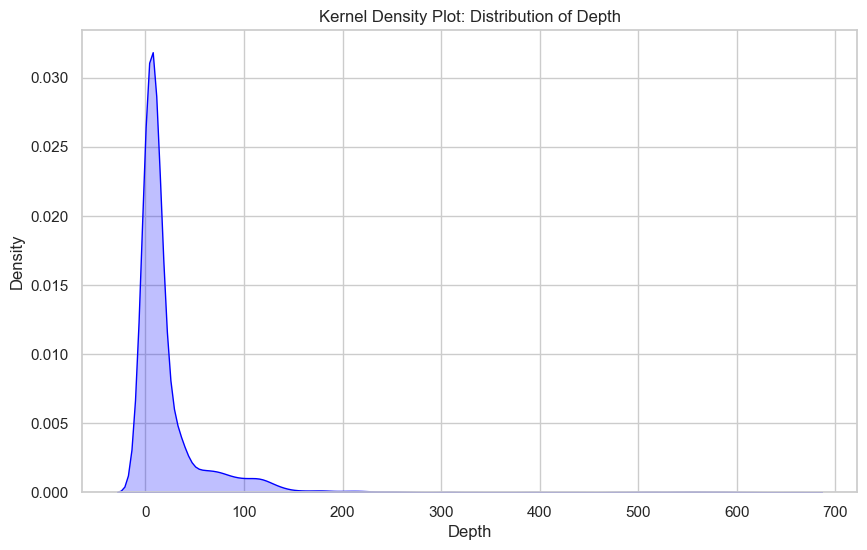

In [79]:
# distribution of 'depth' using a kernel density plot to understand the concentration of earthquake depths.

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a kernel density plot for 'depth'
plt.figure(figsize=(10, 6))
sns.kdeplot(eq['depth'], fill=True, color='blue')

# Customize the plot
plt.title('Kernel Density Plot: Distribution of Depth')
plt.xlabel('Depth')
plt.ylabel('Density')
plt.show()

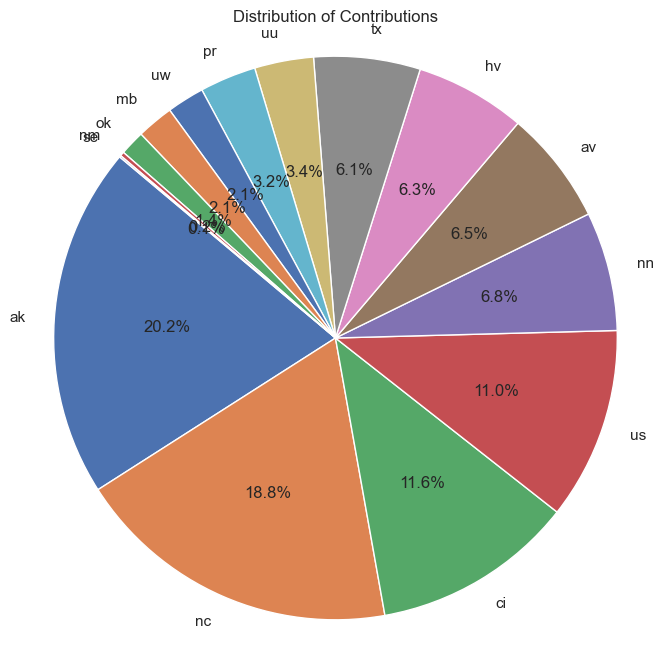

In [80]:
# Display the distribution of contributions using a pie chart.

type_counts = eq['net'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Contributions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

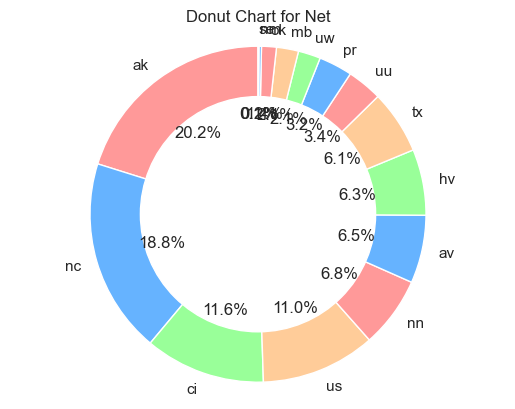

In [81]:


# Display the distribution of contributions using a pie chart.

net_counts = eq['net'].value_counts()

# Create a figure and axes
fig, ax = plt.subplots()

# Define colors for the donut chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Create a donut chart
ax.pie(net_counts, labels=net_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Draw a circle in the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a title
ax.set_title('Donut Chart for Net')

# Display the chart
plt.show()


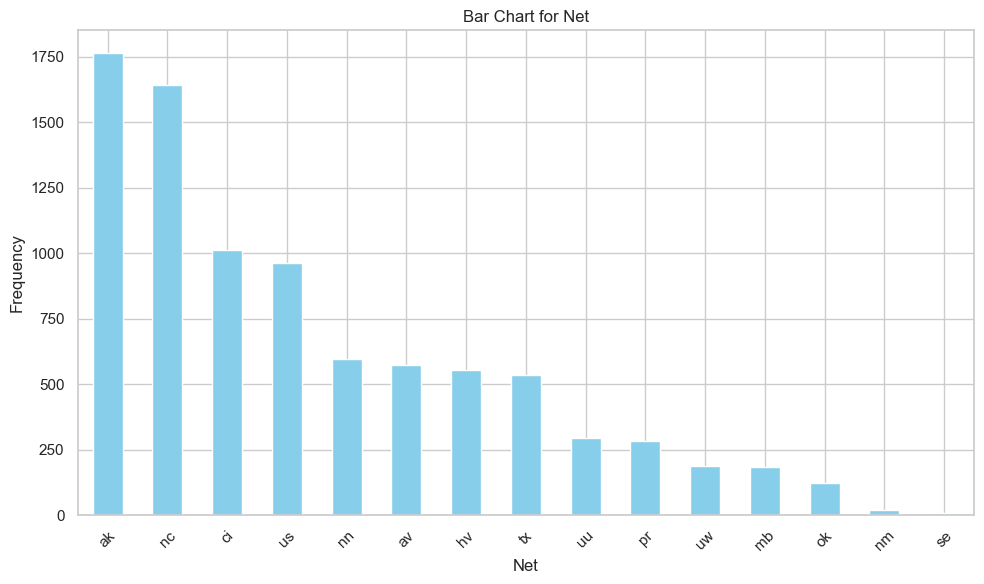

In [82]:
# Display the distribution of contributions using a bar chart

net_counts = eq['net'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
net_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Net')
plt.ylabel('Frequency')
plt.title('Bar Chart for Net')

# Show the chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

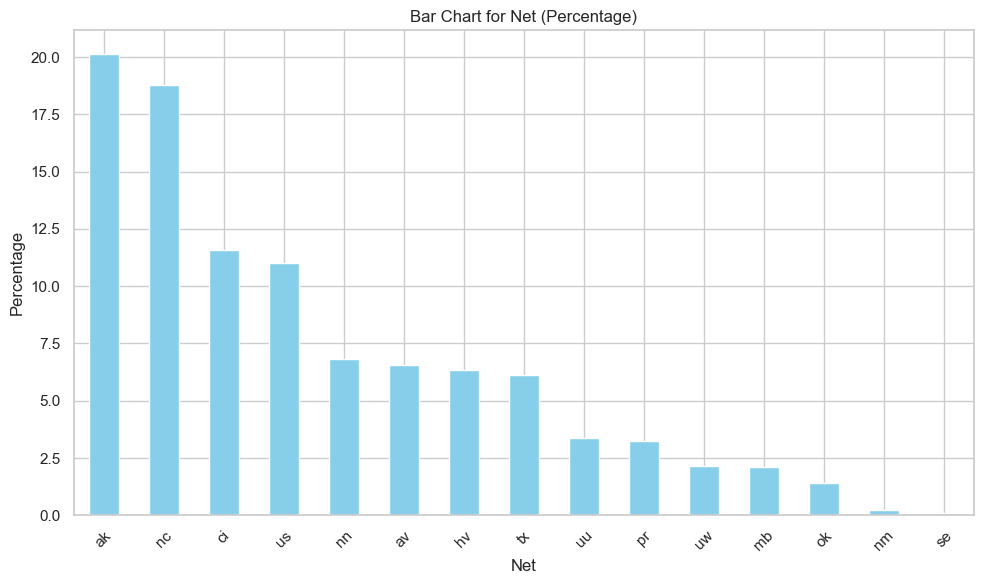

In [83]:


# Change frequency to percentage on the bar chart 

net_counts = eq['net'].value_counts(normalize=True) * 100  # Calculate percentages

# Create a bar chart
plt.figure(figsize=(10, 6))
net_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Net')
plt.ylabel('Percentage')
plt.title('Bar Chart for Net (Percentage)')

# Show the chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

# Change frequency to percentage on the bar chart 

net_counts = eq['net'].value_counts(normalize=True) * 100  # Calculate percentages

# Create a bar chart
plt.figure(figsize=(10, 6))
net_counts.plot(kind='bar', colors = sns.color_palette("husl", len(eq['net'].unique()))  # Define a color palette

# Add labels and title
plt.xlabel('Net')
plt.ylabel('Percentage')
plt.title('Bar Chart for Net (Percentage)')

# Show the chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


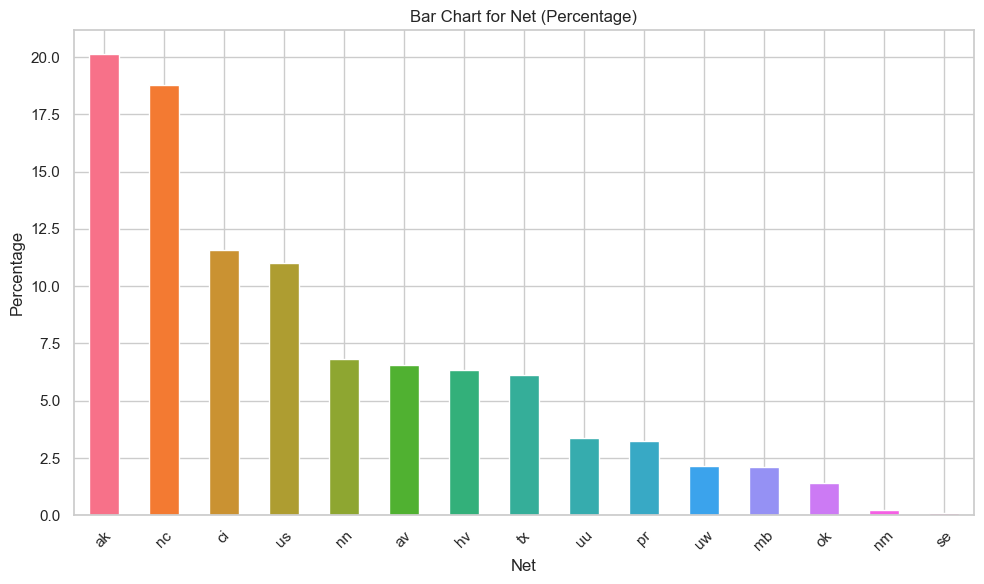

In [91]:
# change colour of the bar chart

net_counts = eq['net'].value_counts(normalize=True) * 100  # Calculate percentages

# Create a bar chart
plt.figure(figsize=(10, 6))
net_counts.plot(kind='bar', color=sns.color_palette("husl", len(eq['net'].unique())))  # Corrected color argument

# Add labels and title
plt.xlabel('Net')
plt.ylabel('Percentage')
plt.title('Bar Chart for Net (Percentage)')

# Show the chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


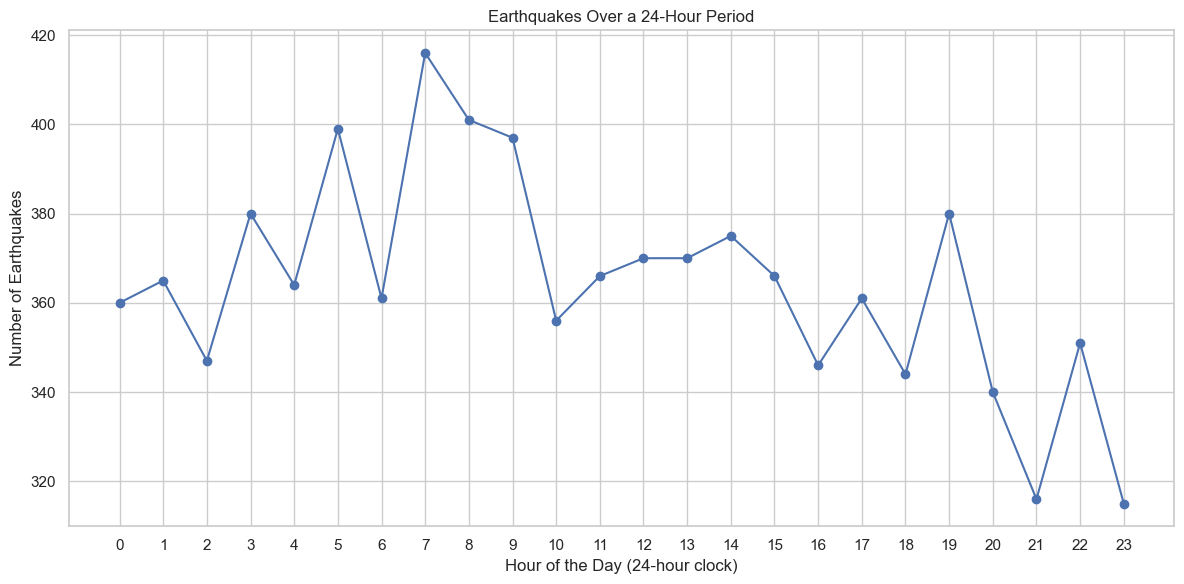

In [85]:

#  line chart showing the number of earthquakes over a 24-hour period.

# Convert the 'time' column to datetime format
eq['time'] = pd.to_datetime(eq['time'])

# Group the earthquakes by hour of the day and count the occurrences
eq_by_hour = eq.groupby(eq['time'].dt.hour).size()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(eq_by_hour.index, eq_by_hour.values, marker='o', linestyle='-')
plt.title('Earthquakes Over a 24-Hour Period')
plt.xlabel('Hour of the Day (24-hour clock)')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.xticks(range(24))
plt.tight_layout()

# Show the line chart
plt.show()


In [86]:
# create a line chart to show the number of earthquakes over a 24-hour period in the NW of The Geysers, CA

# First filter earthquakes in the NW of The Geysers, CA
geysers_eq = eq[eq["place"].str.contains("NW of The Geysers, CA")]



In [87]:
# print the number of earthquakes in the geysers_eq dataset to ensure data has been filtered
num_earthquakes = geysers_eq.shape[0]

print("Number of earthquakes in NW of The Geysers, CA:", num_earthquakes)

Number of earthquakes in NW of The Geysers, CA: 669


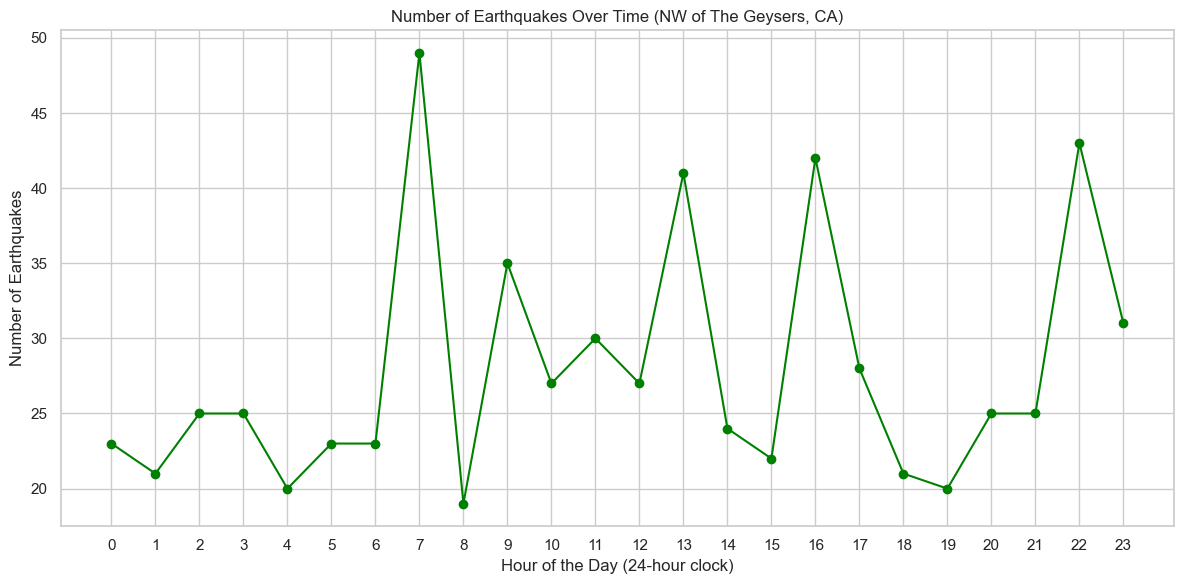

In [88]:

# now the data has been filtereed for the NW of The Geysers, CA a line chart can be created for this region 

eq['time'] = pd.to_datetime(eq['time'])

# Filter the dataset for earthquakes in NW of The Geysers, CA
geysers_eq = eq[eq['place'].str.contains('NW of The Geysers, CA')]

# Group the earthquakes by hour of the day and count the occurrences
eq_by_hour = geysers_eq.groupby(geysers_eq['time'].dt.hour).size()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(eq_by_hour.index, eq_by_hour.values, marker='o', color = 'green', linestyle='-')
plt.title('Number of Earthquakes Over Time (NW of The Geysers, CA)')
plt.xlabel('Hour of the Day (24-hour clock)')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.xticks(range(24))
plt.tight_layout()

# Show the line chart
plt.show()
